<a href="https://colab.research.google.com/github/Dinsaurralde/data_bases/blob/main/11_09Grupo7_Aprendizaje_No_Supervisado_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    
## Aprendizaje No Supervisado DiploDatos
    Laura Alonso Alemany y Valeria Rulloni
## Agrupamiento con el FIFA 2022 dataset
 
Material basado en notas de Ana Georgina Flesia bajo los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/), a su vez basado de material de [SilveMel](https://www.kaggle.com/karangadiya/fifa19/downloads/data.csv/comments) y otros... 

Grupo 7

Nicolas DA VIA
Francisco RUA
Adrian KOZAMEH
Diana INSAURRALDE

### Indice de temas
1. [Inicialización del entorno](#1.-Inicialización-del-entorno)
2. [Preparación de los datos](#2.-Preparación-de-los-datos)
3. [Clustering KM](#3.-Clustering-con-Kmeans)
4. [Clustering MS](#4.-Clustering-con-Mean-Shift)
5. [Clustering KM2](#5.-Clustering-con-Kmeans-sin-arqueros)
6. [Clustering MS2](#6.-Clustering-con-Mean-Shift-sin-arqueros)

## 1.-Inicialización-del-entorno

Empezamos cargando algunas herramientas para cargar los datos y manipularlos.

In [153]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

In [154]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

In [155]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

In [156]:
from sklearn import preprocessing

## 2.-Consignas

Con la nueva base, realizar un análisis análogo al que realizamos en el cursado de la materia con los datos FIFA2019. Realice comentarios en cada parte (verbose=True ;))

1- Análisis exploratorio de la base.


2- Evaluación visual  e intuitiva de a dos variables numéricas por vez.


3- Uso de dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica. Elección justificada de hiper-parámetros


4- Evaluación y Análisis de los clusters encontrados.


5- Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué ?


6- Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.


Cargamos los datos bajados de la database de [Kaggle](https://www.kaggle.com/karangadiya/fifa19) como 'data.csv'. 

Analisis preparatorio de la base

In [157]:
url='https://raw.githubusercontent.com/Dinsaurralde/data_bases/main/players_22.csv'

In [158]:
df=pd.read_csv(url)

In [159]:
df.head(5)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,...,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,...,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,...,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,Right

In [160]:
print(df.columns)
print(len(df.columns), 'variables')

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)
110 variables


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [162]:
print(df.describe())

           sofifa_id       overall     potential     value_eur       wage_eur  \
count   19239.000000  19239.000000  19239.000000  1.916500e+04   19178.000000   
mean   231468.086959     65.772182     71.079370  2.850452e+06    9017.989363   
std     27039.717497      6.880232      6.086213  7.613700e+06   19470.176724   
min        41.000000     47.000000     49.000000  9.000000e+03     500.000000   
25%    214413.500000     61.000000     67.000000  4.750000e+05    1000.000000   
50%    236543.000000     66.000000     71.000000  9.750000e+05    3000.000000   
75%    253532.500000     70.000000     75.000000  2.000000e+06    8000.000000   
max    264640.000000     93.000000     95.000000  1.940000e+08  350000.000000   

                age     height_cm     weight_kg   club_team_id  league_level  \
count  19239.000000  19239.000000  19239.000000   19178.000000  19178.000000   
mean      25.210822    181.299704     74.943032   50580.498123      1.354364   
std        4.748235      6.863

In [163]:
print(df.passing)

0        91.0
1        79.0
2        80.0
3        86.0
4        93.0
         ... 
19234    46.0
19235    50.0
19236    45.0
19237    36.0
19238    45.0
Name: passing, Length: 19239, dtype: float64


69.0
[91. 79. 80. 86. 93. nan 83. 75. 81. 82. 76. 71. 74. 89. 65. 67. 87. 85.
 88. 60. 77. 90. 51. 64. 70. 78. 72. 53. 84. 69. 57. 58. 73. 44. 68. 55.
 62. 61. 59. 56. 63. 66. 52. 50. 49. 48. 54. 47. 45. 46. 38. 40. 43. 39.
 41. 35. 42. 36. 37. 34. 33. 31. 32. 29. 28. 25. 30. 27.]


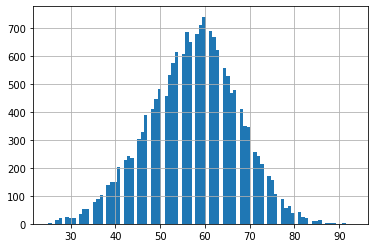

In [164]:
print(df.passing.max()-df.passing.min()+1)
nbins=89
print(df['passing'].unique())
df['passing'].hist(bins = nbins)

In [165]:
club_avg_overall=df.groupby("club_name")["overall"].mean().reset_index().sort_values("overall",ascending=False)
club_avg_overall.head(8)

,club_name,overall
368,Juventus,79.961538
470,Paris Saint-Germain,79.454545
358,Inter,78.857143
241,FC Bayern München,78.071429
412,Manchester United,78.000000
509,Real Madrid CF,77.757576
434,Napoli,77.500000
63,Atalanta,77.480000


Exploramos la variable que indica el desempeño global- **OVERALL**

In [166]:
print(df.overall)

0        93
1        92
2        91
3        91
4        91
         ..
19234    47
19235    47
19236    47
19237    47
19238    47
Name: overall, Length: 19239, dtype: int64


47


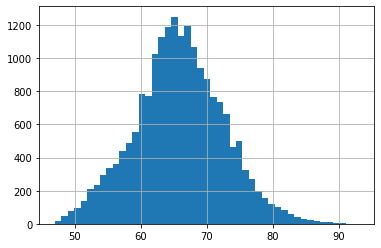

In [167]:
nbins=1*(df.overall.max()-df.overall.min())+1
df['overall'].hist(bins = nbins)
print(nbins)

Indagamos sobre los mejores jugadores por posición 

---



In [168]:
best_players_per_position=(df.iloc[df.groupby(df['player_positions'])['overall'].idxmax()][['player_positions','short_name','overall']])
best_players_per_position.head(10)

,player_positions,short_name,overall
28,CAM,Bruno Fernandes,88
2052,"CAM, CDM",P. Kasami,74
2711,"CAM, CDM, CM",A. Ricaurte,73
1589,"CAM, CDM, LM",Álex Fernández,75
8515,"CAM, CDM, RM",M. Miranda,67
7408,"CAM, CDM, ST",V. Lobry,68
79,"CAM, CF",M. Reus,85
69,"CAM, CF, CM",A. Gómez,85
736,"CAM, CF, LM",A. Younes,78
3127,"CAM, CF, LW",F. Forestieri,72


In [169]:
pd.DataFrame(df.player_positions.value_counts().sort_index())

,player_positions
CAM,219
"CAM, CDM",11
"CAM, CDM, CM",4
"CAM, CDM, LM",1
"CAM, CDM, RM",1
"CAM, CDM, ST",1
"CAM, CF",31
"CAM, CF, CM",6
"CAM, CF, LM",4
"CAM, CF, LW",2


2.-Preparación-de-los-datos-a analizar
Reducimos el tamaño de la base. Retiramos jugadores con bajo Desempeño global ("Overall"),

y consideramos Variables de desempeño por habilidad (skills_ratings)

Preprocesamiento de datos

In [170]:
n=10000 #cantidad de jugadores a considerar

df_n=df.loc[:n] #se reduce la base a los n primeros jugadores

df_n=df_n[(df_n['overall']>70)]

skills_ratings = ['overall', 'potential','skill_moves',
       'international_reputation', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']
print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

45 variables numéricas de desempeño según habilidad


In [171]:
df_skills =df_n[skills_ratings] #base, sólo con desempeños según habilidad (numéricas)

In [172]:
df_skills.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4593 entries, 0 to 4592
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      4593 non-null   int64  
 1   potential                    4593 non-null   int64  
 2   skill_moves                  4593 non-null   int64  
 3   international_reputation     4593 non-null   int64  
 4   pace                         4149 non-null   float64
 5   shooting                     4149 non-null   float64
 6   passing                      4149 non-null   float64
 7   dribbling                    4149 non-null   float64
 8   defending                    4149 non-null   float64
 9   physic                       4149 non-null   float64
 10  attacking_crossing           4593 non-null   int64  
 11  attacking_finishing          4593 non-null   int64  
 12  attacking_heading_accuracy   4593 non-null   int64  
 13  attacking_short_pa

In [173]:
df_skills= df_skills.fillna(0) #imputamos el valor cero a los valores nulos

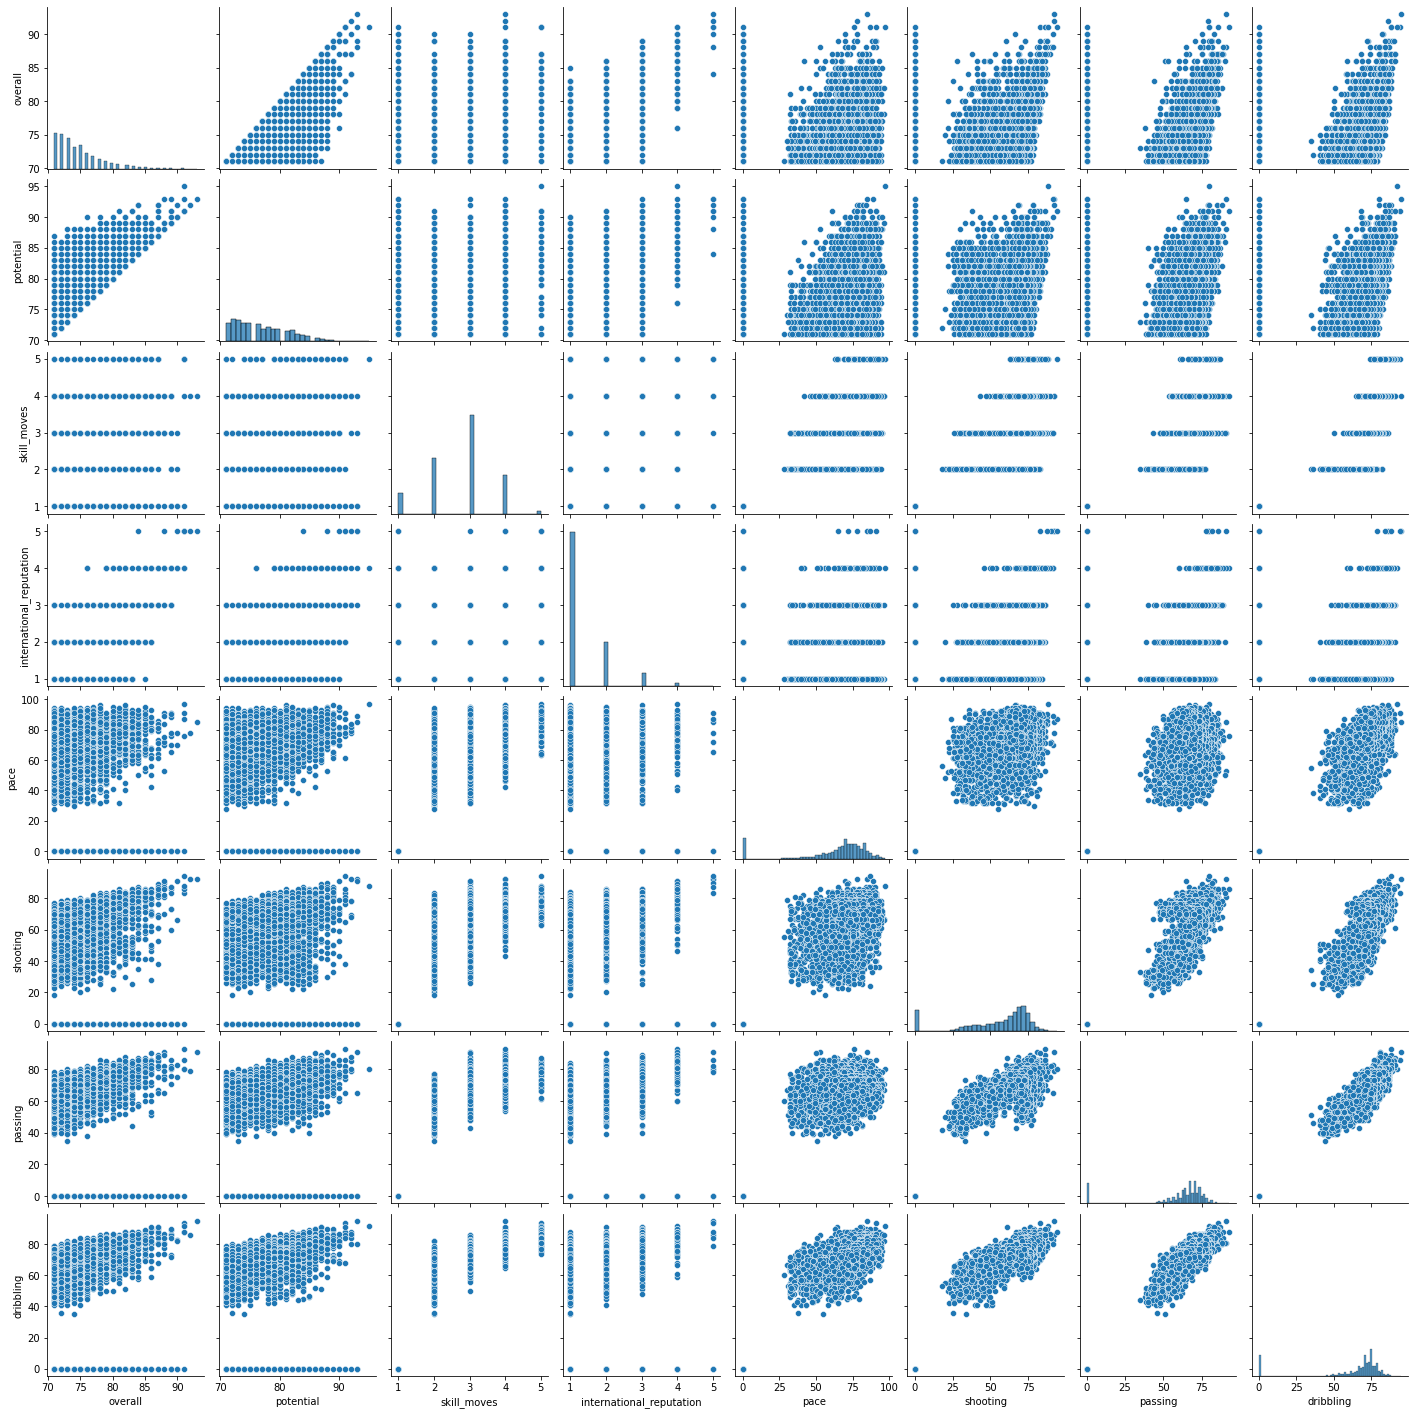

In [174]:
sns.pairplot(df_skills[skills_ratings[0:8]])

In [175]:
MachineGunDict={'Name':'MachineGun','overall':99}
for skills in skills_ratings:
    MachineGunDict[skills]=99

In [176]:
JugadorPromedioDict={'Name':'JugadorPromedio','overall':df_n.overall.mean()}
for skills in skills_ratings:
    JugadorPromedioDict[skills]=df_n[skills].mean()

# 3.-Clustering-con-Kmeans

ES necesario definirle la cantidad de grupos/clusters (n_clusters), es un hiperparámetro del algoritmo. 


In [177]:
# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(df_skills) #utiliza todas las habilidades: 45 dimensiones

# Etiquetas asignadas por el algoritmo
clusters = km.labels_
#print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)

In [178]:
df_clusters=df_n.copy()
df_clusters['kmeans_4'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')
df_clusters

Kmeans encontró:  4 clusters, nosotros forzamos la cantidad


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,kmeans_4
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,...,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png,2
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,...,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png,2
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,...,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png,2
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,Right,5,5,5,H

**Graficamos el resultado de agrupar a los jugadores usando kmedias con la cantidad de clases elegida: Visualizamos de a dos variables por vez**

**Elección de la cantidad de grupos/clusters**

Una forma de seleccionar la cantidad más adecuada de clusters es probar varias cantidades y usar el criterio del codo: "elbow method", utilizando una medida de ajuste que puede ser Inertia.

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

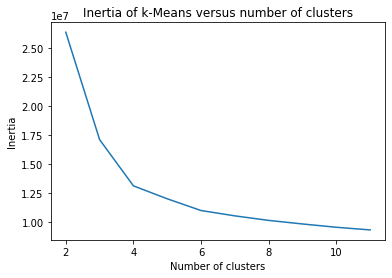

In [179]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i).fit(df_skills).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [180]:
#data=[]
bool_crack=df_n["overall"] > 85 #diferenciamos a los mejores jugadores

#Elejimos dos variables, para esto elegimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[19] #5,  2
skill_2=skills_ratings[5]  #29, 4 

In [181]:
kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [182]:
#En Colab:
fig.show(renderer="colab")

**ANÁLISIS**

**EJERCICIO: Análisis exploratorio de los clusters, usando las clases asignadas por kmeans** 
- Cantidad de observaciones por Cluster
- Análisis descriptivo separando por Cluster  
- Tabla de contingencia: alguna categórica vs clusters para ver posible asociación


In [183]:
df_clusters['kmeans_4'].value_counts()


0    1726
2    1499
3     924
1     444
Name: kmeans_4, dtype: int64

Ayuda: Creamos una nueva variable categórica de la base recodificando la posición para simplificar el análisis de los resultados de clustering

In [184]:
forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']
goalkeepers=['GK']

def pos2(position):
    if position.split(',',1)[0] in forwards:
        return 'Forward'
    
    elif position.split(',',1)[0] in midfielders:
        return 'Midfielder'
    
    elif position.split(',',1)[0] in defenders:
        return 'Defender'
    
    elif position.split(',',1)[0] in goalkeepers:
        return 'GK'
    
    else:
        return 'nan'

Analisis por posición en la cancha

In [185]:
df_clusters["Position2"]=df_clusters["player_positions"].apply(lambda x: pos2(x))

df_clusters["Position2"].value_counts()

Defender      1485
Forward       1332
Midfielder    1332
GK             444
Name: Position2, dtype: int64

In [186]:
#Cantidad de observaciones por Cluster por posicion
df_cross= pd.crosstab(df_clusters.kmeans_4, df_clusters.Position2,
                                           )



In [187]:
df_cross

Position2,Defender,Forward,GK,Midfielder
kmeans_4,,,,
0,660,132,0,934
1,0,0,444,0
2,0,1200,0,299
3,825,0,0,99


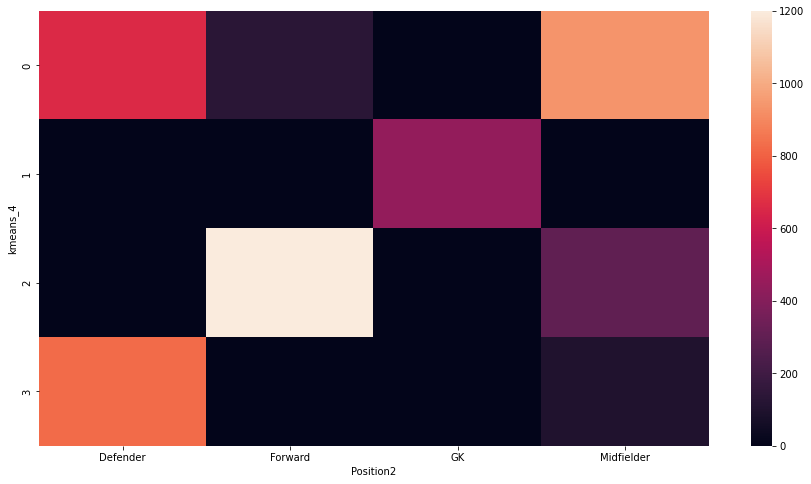

In [188]:

plt.figure(figsize=(15,8))
sns.heatmap(df_cross)

Observamos que efectivamente los arqueros quedan agrupados en un unico cluster GK CLuster 1.

Los grupos defensores y delanteros quedan agrupados en dos clusters respectivamente.


Analisis por edad

In [189]:
#Cantidad de observaciones por Cluster por edad
df_k_age= pd.crosstab(df_clusters.kmeans_4, df_clusters.age,
                                          )
df_k_age

age,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43
kmeans_4,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,7,5,28,61,73,116,136,156,159,148,162,158,132,118,88,66,52,34,15,8,2,2,0,0,0
1,0,0,2,3,11,6,15,21,28,26,29,41,39,35,29,31,28,31,27,9,14,9,4,3,1,2
2,2,9,19,28,74,74,89,115,138,126,129,121,150,106,92,62,58,48,22,14,10,6,4,3,0,0
3,0,1,5,16,49,42,62,75,84,73,76,76,82,57,72,51,42,28,15,9,6,3,0,0,0,0


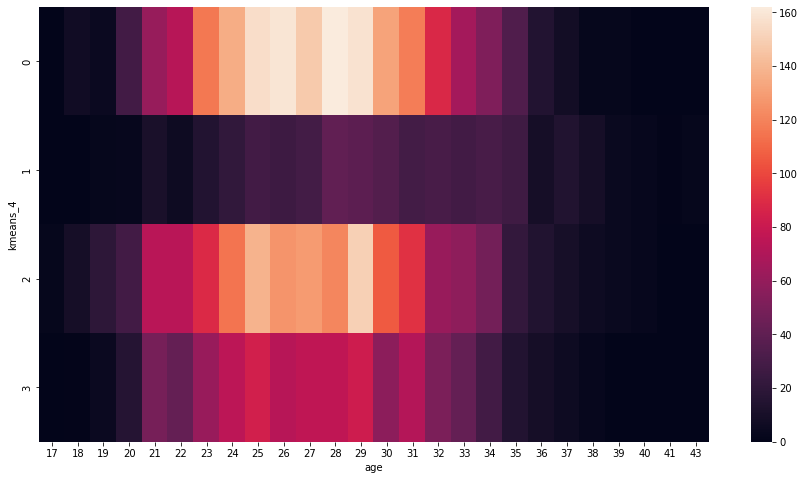

In [190]:
plt.figure(figsize=(15,8))
sns.heatmap(df_k_age)

Analisis por pie 

In [191]:
#Cantidad de observaciones por Cluster por prefered foot
df_k_foot= pd.crosstab(df_clusters.kmeans_4, df_clusters.preferred_foot,
                                          )
df_k_foot

preferred_foot,Left,Right
kmeans_4,,
0,519,1207
1,60,384
2,381,1118
3,207,717


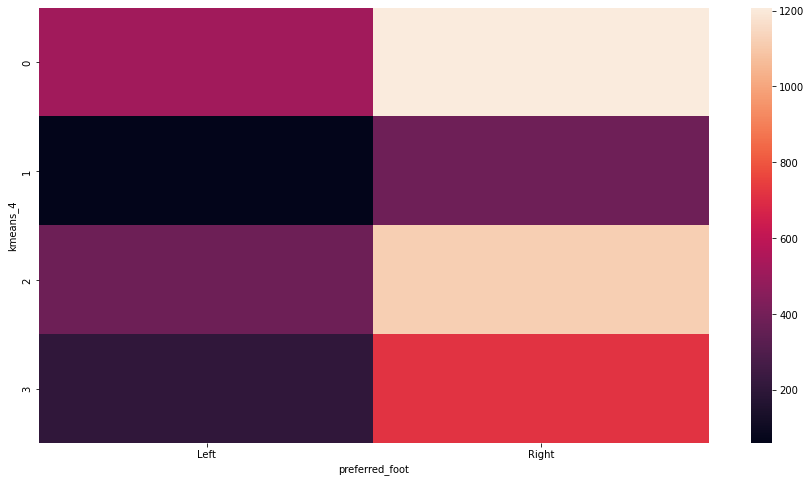

In [192]:
plt.figure(figsize=(15,8))
sns.heatmap(df_k_foot)

Como es de esperar, en relación al cluster que quedó conformado por arqueros 

Armamos un dataframe con cada cluster

In [193]:
cluster0 = df_clusters[df_clusters['kmeans_4']  == 0]
cluster1 = df_clusters[df_clusters['kmeans_4']  == 1]
cluster2 = df_clusters[df_clusters['kmeans_4']  == 2]
cluster3 = df_clusters[df_clusters['kmeans_4']  == 3]

Cluster Jerarquico

Definimos variables de interes para el cluster jerarquico

In [194]:
n=4000 #cantidad de jugadores a considerar

df_n1=df.loc[:n] #se reduce la base a los n primeros jugadores

df_n1=df_n1[(df_n1['overall']>70)]

hierarchy = ['overall', 'skill_moves', 'age',
       'skill_ball_control','movement_reactions', 
       'mentality_positioning', 'mentality_vision' ,'power_stamina']
print(len(hierarchy), 'variables numéricas de desempeño según habilidad, edad, facturación')


8 variables numéricas de desempeño según habilidad, edad, facturación


In [195]:
df_hierarchy =df_n1[hierarchy]


In [196]:
df_hierarchy.isna().sum()

overall                  0
skill_moves              0
age                      0
skill_ball_control       0
movement_reactions       0
mentality_positioning    0
mentality_vision         0
power_stamina            0
dtype: int64

In [197]:
df_hierarchy.fillna(0)

,overall,skill_moves,age,skill_ball_control,movement_reactions,mentality_positioning,mentality_vision,power_stamina
0,93,4,34,96,94,93,95,72
1,92,4,32,88,93,95,81,76
2,91,5,36,88,94,95,76,77
3,91,5,29,95,89,86,90,81
4,91,4,30,91,91,88,94,89
...,...,...,...,...,...,...,...,...
3996,71,3,30,68,69,72,68,63
3997,71,3,31,73,75,64,55,71
3998,71,3,27,68,67,74,61,77
3999,71,3,26,77,70,66,73,90


In [198]:
df_hierarchy.isna().sum()

overall                  0
skill_moves              0
age                      0
skill_ball_control       0
movement_reactions       0
mentality_positioning    0
mentality_vision         0
power_stamina            0
dtype: int64

In [199]:
X = df_hierarchy # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)
X_norm = pd.DataFrame(x_scaled, columns=df_hierarchy.columns)

Dendograma

In [200]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

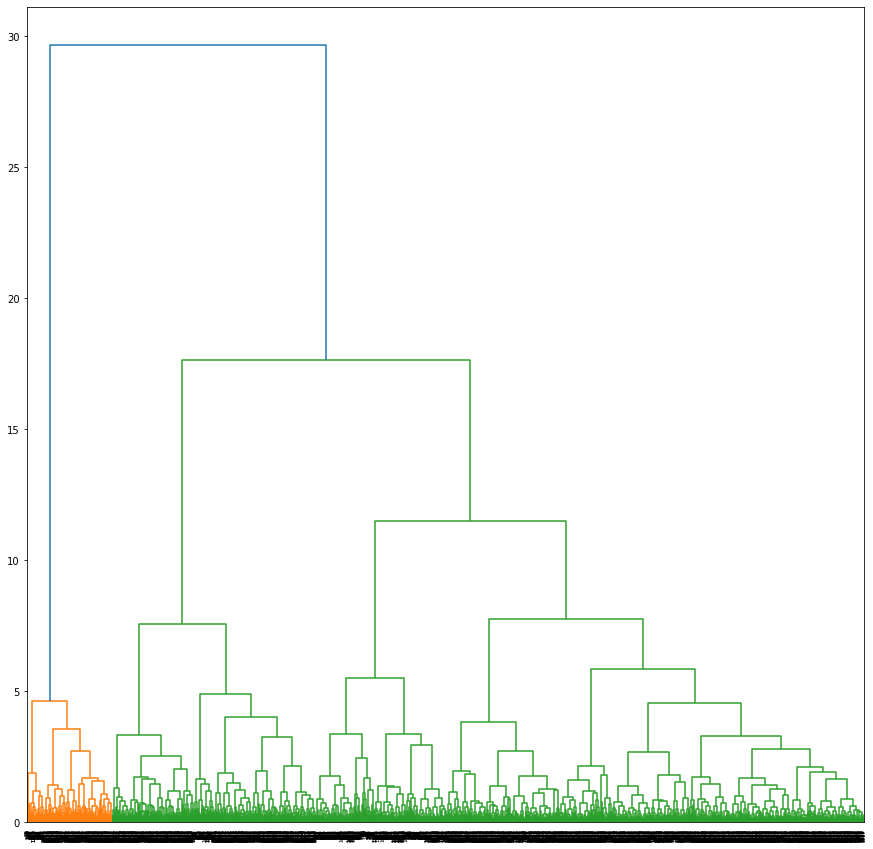

In [201]:
plt.figure(figsize=(15, 15))
dend = shc.dendrogram(shc.linkage(X_norm, method='ward'))

In [202]:
clstr= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')


In [203]:
labels_=clstr.fit_predict(X_norm)


In [204]:
labels_

array([1, 1, 1, ..., 2, 2, 4])

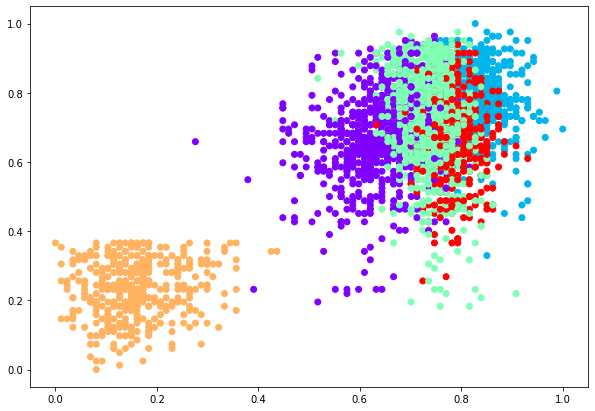

In [205]:
plt.figure(figsize=(10, 7))
plt.scatter(X_norm['skill_ball_control'], X_norm['power_stamina'],c=clstr.labels_, cmap='rainbow')

# 4.-Clustering-Mean-Shift 

- NO es necesario definirle la cantidad de grupos/clusters
- NO es escalable, computacionalmente es muy pesado. Cada dato tienen un proceso iterativo en donde en cada iteración considera los vecinos a menos de un radio de distancia.
- Hipeparámetros: radio/bandwith (de cobertura para cálculo de media). (Ejercicio: Probar con varios)

Los datos no se encuentran escalados

In [206]:
# ms = MeanShift(bandwidth=None, bin_seeding=False)

# ms.fit(df_skills)

# clusters2 = ms.labels_
# cluster_centers = ms.cluster_centers_

# labels_unique = np.unique(clusters2)
# n_clusters_ = len(labels_unique)

# print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Graficamos los resultados:

In [207]:
# bool_crack=df_n["overall"] > 85
# bool_no_crack=df_n["overall"]<86

# #Eligo dos números entre 0 y  de n_skills-1
# skill_1=skills_ratings[5]
# skill_2=skills_ratings[14]

In [208]:
# data=[]
# MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
#                            mode='markers',
#                         text=df_n.loc[:,'short_name'],
#                            marker=dict(
#                                 size=5,
#                                 color = clusters2.astype(np.float), #set color equal to a variable
#                                 colorscale='Portland',
#                                 showscale=False)
#                            )

# crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
#                       text=df_n.loc[bool_crack,'short_name'],
#                       textfont=dict(family='sans serif',size=10,color='black'),
#                       opacity=0.9,mode='text')

# data=[MeanShift_clusters,crack]

# layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
#                 xaxis=dict(title=skill_1),
#                 yaxis=dict(title=skill_2),
#                 autosize=False, width=1000,height=650)

# fig = go.Figure(data=data, layout=layout)

In [209]:
# #En Colab
# fig.show(renderer="colab")

In [210]:
# df_clusters['MeanShift'] = ms.labels_ #clusters2
# print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros lo forzamos')
# print('Mean shift encontró ', max(ms.labels_)+1, 'clusters, según los hiperparámetros elegidos')

## Mean-Shift con datos escalados

In [211]:
# from sklearn import preprocessing

# X = df_skills # numpy array
# scaler = preprocessing.MinMaxScaler()
# x_scaled = scaler.fit_transform(X)
# X_norm = pd.DataFrame(x_scaled, columns=df_skills.columns)

In [212]:
# X_norm

In [213]:
# ms = MeanShift(bandwidth=40, bin_seeding=False)

# ms.fit(X_norm)

# clusters2 = ms.labels_
# cluster_centers = ms.cluster_centers_

# labels_unique = np.unique(clusters2)
# n_clusters_ = len(labels_unique)

# print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

In [214]:
# #Elijo dos números entre 0 y  de n_skills-1
# bool_crack=df_n["overall"] > 85
# bool_no_crack=df_n["overall"]<86
# skill_1=skills_ratings[5]
# skill_2=skills_ratings[14]

In [215]:
# data=[]
# MeanShift_clusters = go.Scatter(x=X_norm[skill_1], y=X_norm[skill_2],
#                            mode='markers',
#                         text=df_n.loc[:,'short_name'],
#                            marker=dict(
#                                 size=5,
#                                 color = clusters2.astype(np.float), #set color equal to a variable
#                                 colorscale='Portland',
#                                 showscale=False)
#                            )

# crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
#                       text=df_n.loc[bool_crack,'short_name'],
#                       textfont=dict(family='sans serif',size=10,color='black'),
#                       opacity=0.9,mode='text')

# data=[MeanShift_clusters,crack]

# layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
#                 xaxis=dict(title=skill_1),
#                 yaxis=dict(title=skill_2),
#                 autosize=False, width=1000,height=650)

# fig = go.Figure(data=data, layout=layout)

In [216]:
# #En Colab
# fig.show(renderer="colab")

**EVALUACIÓN, ANÁLISIS: Análisis exploratorio de los clusters, usando las clases/clusters asignadas por MeanShift** 

In [217]:
#Cantidad de observaciones por Cluster
#Análisis descriptivo separando por Cluster
#Tabla de contingencia alguna categórica vs clusters
#Tabla de contingencia kmeans vs meanshift...
#otras ideas?


**Pregunta: normalizamos/estandarizamos la base?**

Si, es necesario estandarizar la base, llevando los datos a una escala commun 0- 1 , dado que las variables poseen distintos rangos de valor, pudiendo generar distorsiones en los resultados.

**Ahora vemos que agrupamientos se pueden hacer excluyendo los arqueros**

# 5.-Clustering-con-Kmeans-subpoblación

In [218]:
n=10000
df_n2=df_clusters.loc[:n]
df_n2=df_n2[(df_n2["Position2"]!='GK')&(df_n['overall']>70)]

skills_r = ['attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle']

print(len(skills_r), 'variables numéricas de desempeño según habilidad')




29 variables numéricas de desempeño según habilidad


In [219]:
df_skills2=df_n2[skills_r]

In [220]:
# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(df_skills2)

# Recuperacion de etiquetas
clusters = km.labels_

In [221]:
#data=[]
bool_crack=df_n2["overall"] > 85
bool_no_crack=df_n2["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_r[5]
skill_2=skills_r[15]

In [222]:
kmean_clusters = go.Scatter(x=df_skills2[skill_1], y=df_skills2[skill_2],
                           mode='markers',
                        text=df_n2.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills2.loc[bool_crack,skill_1], y=df_skills2.loc[bool_crack,skill_2],name='Top players',
                      text=df_n2.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

In [223]:
#En Colab
fig.show(renderer="colab")

sacar conclusiones de Kmeans sin arqueros


##**EMBEDDINGS**#

t-SNE : t-distributed Stochastic Neighbor Embedding.

t-SNE es una herramienta para visualizar datos altamente dimensionales.

Los "proyecta" en menos dimensiones (2D o 3D) manteniendo la distancia entre ellos.

Consideramos: filas/observaciones  xi  y  xj  (jugador i y jugador j) en  Rn .

Comienza convirtiendo distancias entre puntos (observaciones) en probabilidades condicionales.

d(xi,xj)→p(xj|xi) ,

Y luego va acomodando puntos asociados (en el plano 2D o el espacio 2D) que "ajusten" las probabilidades condicionales.

x′i  y  x′j  en  R2  (para el jugador i y jugador j )  p(x′j|x′i)↔d(x′i,x′j) ,

p(xj|xi)≈p(x′j|x′i) 

El ajuste consiste en minimizar la divergencia Kullback-Leibler entre las probabilidades condicionales establecidas en el espacio de mayor dimension y las determinadas en el espacio de menor dimension.

El modelo de distribución de probabilidad es el de t-Student

t-SNE tiene una función de costo que no es convexa, por lo cual diferentes inicializaciones pueden dar diferentes resultados.

In [253]:
n_sne=2000 #elegir numero pequeño para agilidad en el cálculo luego
df_sne=df.loc[:n_sne]
skills_ratings_sne = ['overall', 'potential','skill_moves',
       'international_reputation', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']
X=df_sne[skills_ratings_sne]
print('dimensión del espacio de los datos: ', len(skills_ratings))

dimensión del espacio de los datos:  45


In [286]:
df_sne.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,...,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,...,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,...,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,Right

In [254]:
df_skills_sne=df_sne[skills_ratings_sne]

In [255]:
df_skills_sne.isnull().sum()

overall                          0
potential                        0
skill_moves                      0
international_reputation         0
pace                           208
shooting                       208
passing                        208
dribbling                      208
defending                      208
physic                         208
attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy       0
attacking_short_passing          0
attacking_volleys                0
skill_dribbling                  0
skill_curve                      0
skill_fk_accuracy                0
skill_long_passing               0
skill_ball_control               0
movement_acceleration            0
movement_sprint_speed            0
movement_agility                 0
movement_reactions               0
movement_balance                 0
power_shot_power                 0
power_jumping                    0
power_stamina                    0
power_strength      

In [256]:
df_skills_sne.fillna(method='bfill', inplace=True)

Transformamos el espacio de dim 45 en un espacio de dimensión 2 (n_components=2)

In [267]:
X= df_skills_sne

In [268]:
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)
X_norm_sne = pd.DataFrame(x_scaled, columns=df_skills_sne.columns)

In [269]:
X_norm_sne.isna().sum()

overall                        0
potential                      0
skill_moves                    0
international_reputation       0
pace                           0
shooting                       0
passing                        0
dribbling                      0
defending                      0
physic                         0
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_accuracy              0
skill_long_passing             0
skill_ball_control             0
movement_acceleration          0
movement_sprint_speed          0
movement_agility               0
movement_reactions             0
movement_balance               0
power_shot_power               0
power_jumping                  0
power_stamina                  0
power_strength                 0
power_long_shots               0
mentality_

In [270]:
from sklearn import (manifold, preprocessing, decomposition)
import time

In [271]:
time_start = time.time()

tsne = manifold.TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_norm_sne)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2001 samples in 0.000s...
[t-SNE] Computed neighbors for 2001 samples in 0.192s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2001
[t-SNE] Computed conditional probabilities for sample 2000 / 2001
[t-SNE] Computed conditional probabilities for sample 2001 / 2001
[t-SNE] Mean sigma: 0.255540
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.789185
[t-SNE] KL divergence after 1000 iterations: 1.341460
t-SNE done! Time elapsed: 14.701807975769043 seconds


El resultado (X_tsne) se guarda en una arreglo numpy

de tamaño:

cantidad de filas = cantidad de jugadores considerados = n_tsne y

cantidad de columnas= n_components = 2

In [272]:
print(X_tsne.shape)
print(X_tsne)
#X_tsne[1990:2000] #diez jugadores

(2001, 2)
[[-36.313778  12.883321]
 [-38.934002  11.804601]
 [-37.896576  11.991609]
 ...
 [ -4.654954   2.421536]
 [-29.261562 -13.255288]
 [ 32.83677   11.138981]]


GRAFICAMOS: Scatter plot

Las variables que usamos para el scatterplot son las 2 componentes dadas por tSNE

agregamos los nombres de los ckack ("Overall" más de 85) y vemos una tercera variable recorriendo los puntos sobre el gráfico

In [277]:
data=[]
bool_crack=df_sne["overall"] > 85 #diferenciamos a los mejores jugadores

#graficamos los datos en el espacio transformado: las dos componentes tsne

graf1 = go.Scatter(x=X_tsne[:,0], y=X_tsne[:,1],
                           mode='markers',
                        text=df_sne.loc[:,'club_name'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=X_tsne[bool_crack,0], y=X_tsne[bool_crack,1],name='Los más mejores',
                      text=df_sne.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base en el espacio tsne",titlefont=dict(size=20),
                xaxis=dict(title='componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=700)

fig = go.Figure(data=data, layout=layout)

#iplot(fig)
#plot(fig)

In [278]:
#En Colab
fig.show(renderer="colab")

INTERPRETACIÓN

Un poco de análisis visual supervisado usando tsne

Ponemos a prueba la intuición o preconcepto de que los jugadores se agrupan en el espacio de las habilidades (transformado/reducido por tsne) según la posición...

Creamos una nueva columna con 4 categorias de posiciones:

In [287]:
forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']
goalkeepers=['GK']

def pos2(position):
    if position.split(',',1)[0] in forwards:
        return 'Forward'
    
    elif position.split(',',1)[0] in midfielders:
        return 'Midfielder'
    
    elif position.split(',',1)[0] in defenders:
        return 'Defender'
    
    elif position.split(',',1)[0] in goalkeepers:
        return 'GK'
    
    else:
        return 'nan'

In [292]:
df_sne["Position2"]=df_sne["player_positions"].apply(lambda x: pos2(x))

In [293]:

df_sne["Position2"].value_counts()

Midfielder    611
Defender      602
Forward       580
GK            208
Name: Position2, dtype: int64

GRAFICAMOS

Las variables que usamos para el scatterplot son las 2 componentes dadas por tSNE

diferenciamos usando vectores booleanos: para cada posición y si es un ckack

In [295]:
bool_striker= df_sne["Position2"] == 'Forward'
bool_midfielder= df_sne["Position2"] == 'Midfielder'
bool_defender= df_sne["Position2"] == 'Defender'
bool_gk= df_sne["Position2"] == 'GK'

bool_crack=df_sne["overall"] > 85

palette=['navy','red','#A2D5F2','orange','green','pink']  
data=[]

striker =go.Scatter(x=X_tsne[bool_striker,0], y=X_tsne[bool_striker,1],name='Striker',
                      text=df_sne.loc[bool_striker,'short_name'],
                      opacity=0.9,marker=dict(color=palette[2],size=5),mode='markers')

midfielder =go.Scatter(x=X_tsne[bool_midfielder,0], y=X_tsne[bool_midfielder,1],name='Midfielder',
                      text=df_sne.loc[bool_midfielder,'short_name'],
                      opacity=0.6,marker=dict(color=palette[1],size=5),mode='markers')

defender =go.Scatter(x=X_tsne[bool_defender,0], y=X_tsne[bool_defender,1],name='Defender',
                      text=df_sne.loc[bool_defender,'short_name'],
                      opacity=0.7,marker=dict(color=palette[3],size=5),mode='markers')

gk =go.Scatter(x=X_tsne[bool_gk,0], y=X_tsne[bool_gk,1],name='GK',
                      text=df_sne.loc[bool_gk,'short_name'],
                      opacity=0.4,marker=dict(color=palette[4],size=5),mode='markers')

crack =go.Scatter(x=X_tsne[bool_crack,0], y=X_tsne[bool_crack,1],name='Top player',
                      text=df_sne.loc[bool_crack,'short_name'],textfont=dict(family='sans serif',color='black',size=16),
                      opacity=0.9,mode='text')

data=[striker,midfielder,defender,gk,crack]

layout = go.Layout(title="t-SNE - Fifa Players",titlefont=dict(size=20),
                autosize=False, width=1000,height=700)

fig = go.Figure(data=data, layout=layout)

#iplot(fig)
#plot(fig)

In [296]:
#En Colab
fig.show(renderer="colab")

Como conclusión, podemos ver que en este espacio 2D es realmente muy evidente la separación de los arqueros del resto de los jugadores (lo cual es lógico pues sus habilidades son muy diferentes, lo vimos también en la primera semana de clases en dimensión 34, graficando de a dos variable por vez).

El agrupamiento visual, en este espacio, de los jugadores no es tan evidente pues los clusters no son disconexos.

Las posiciones no explican tan claramente las cercanías entre jugadores

Una explicación posible puede ser porque hay jugadores ambivalentes que unen los espacios entre defensa, mediocampo y ataque?

Habrá otra explicación??

Que otras variables (que no estamos graficando) pueden explicar los grupos?

En este espacio tsne ... es decir usando "X_tsne[:,0]" y "X_tsne[:,0]"



Cómo se verán los grupos encontrados por kmedias o mean-shift?

Cuantos grupos encontrará Mean Shift? o cuales k-medias? en este espacio? hacerlo para el práctico con los datos FIFA2022